In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

df = pd.read_csv('../datasets/stroke_prediction.csv')


In [4]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

In [5]:
# Handle missing values
# BMI has some N/A, fill with median
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Check class balance
print(df['stroke'].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


C:\Users\Urooj Ilyas\AppData\Local\Temp\ipykernel_9412\828484451.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


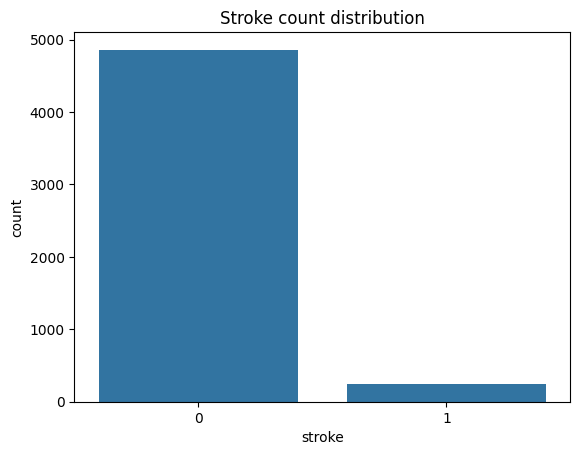

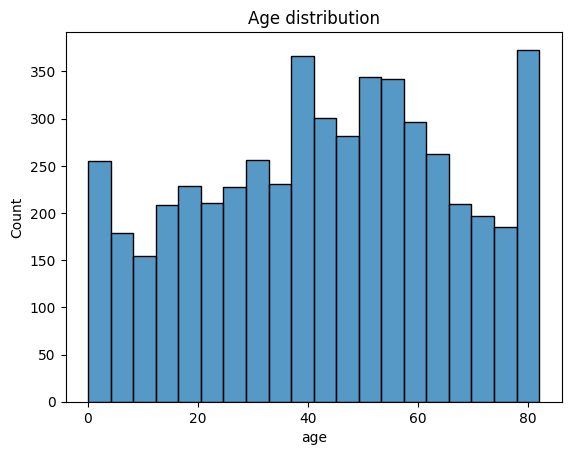

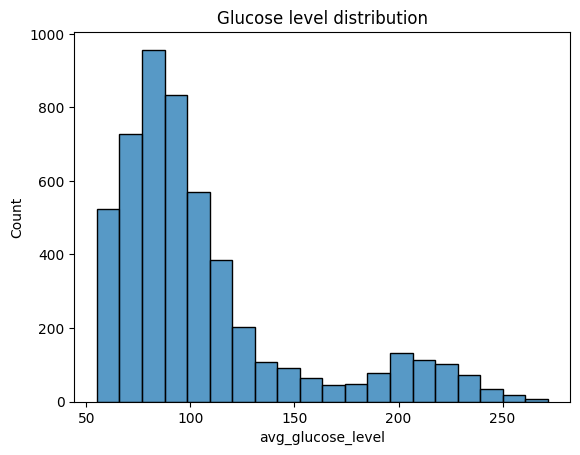

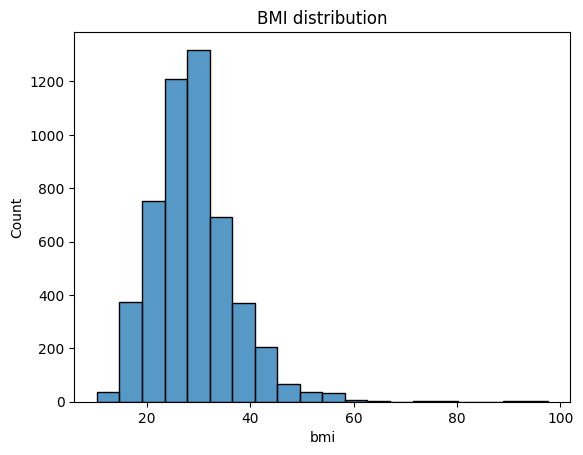

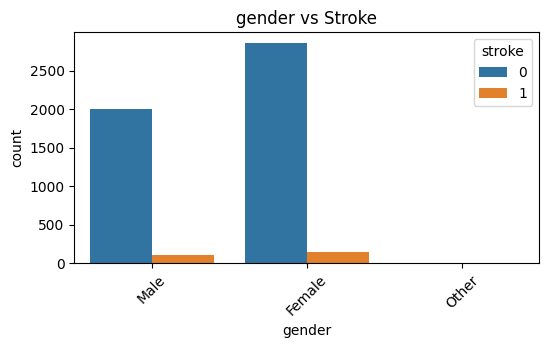

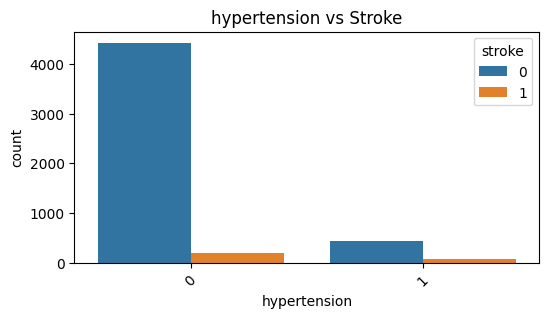

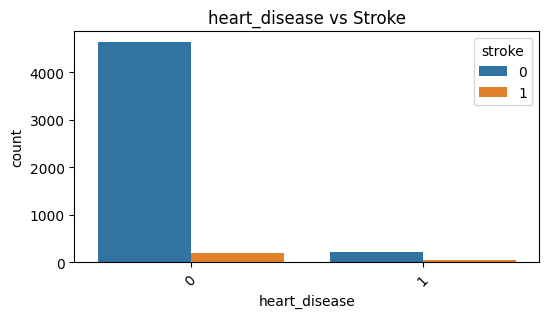

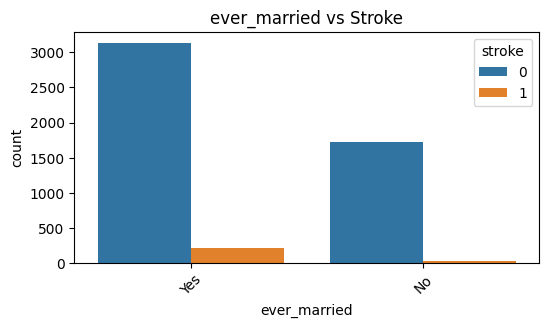

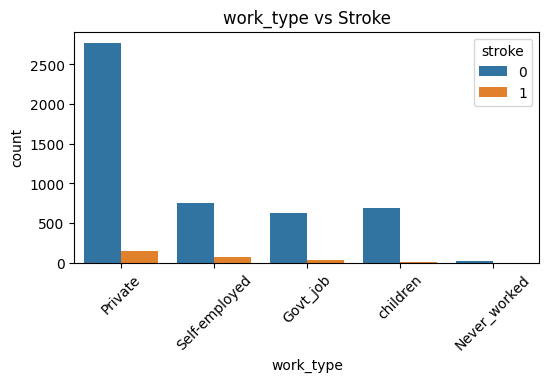

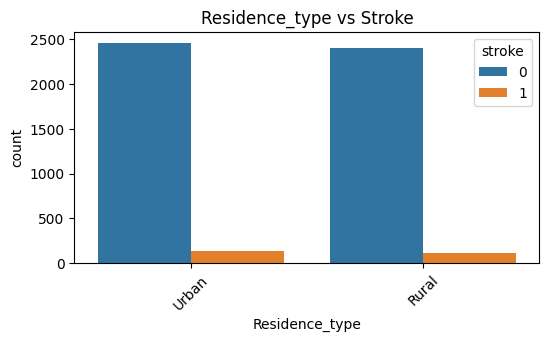

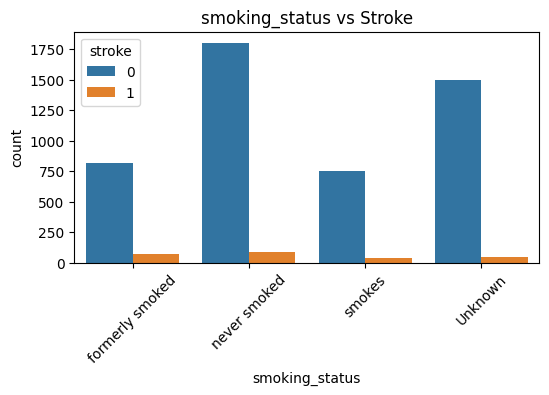

In [6]:
sns.countplot(data=df, x='stroke')
plt.title("Stroke count distribution")
plt.show()

sns.histplot(df['age'], bins=20)
plt.title("Age distribution")
plt.show()

sns.histplot(df['avg_glucose_level'], bins=20)
plt.title("Glucose level distribution")
plt.show()

sns.histplot(df['bmi'], bins=20)
plt.title("BMI distribution")
plt.show()

# Categorical features distribution
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f"{col} vs Stroke")
    plt.xticks(rotation=45)
    plt.show()

In [7]:
encoded_cols = pd.get_dummies(df[['gender','ever_married','work_type','Residence_type','smoking_status']], drop_first=True)

df_encoded = pd.concat([df, encoded_cols], axis=1)

df_encoded.to_csv('../datasets/stroke_prediction.csv', index=False)
print(f"Preprocessed dataset saved. Shape: {df_encoded.shape}")


Preprocessed dataset saved. Shape: (5110, 23)


In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df_encoded.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Male', 'gender_Other',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')